## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

**Load the data into pandas dataframe . Load the Boston Housing DataSet from data/boston_house_prices.csv**

In [2]:
df1 = pd.read_csv('data/boston_house_prices.csv',sep=",",header=1)
print(df1.head())
print(df1.info())
print(df1.describe())

df2 = pd.read_csv('data/USA_Housing.csv',sep=",")
print(df2.head())
print(df2.info())
print(df2.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float6

In [3]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


**Data preprocessing**

Check for missing values in all the columns

In [5]:
missing_values = df1.isnull().sum()

print("Valores nulos en cada columna:")
print(missing_values)


Valores nulos en cada columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
missing_values = df2.isnull().sum()

print("Valores nulos en cada columna:")
print(missing_values)

Valores nulos en cada columna:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


**Data Visualization**

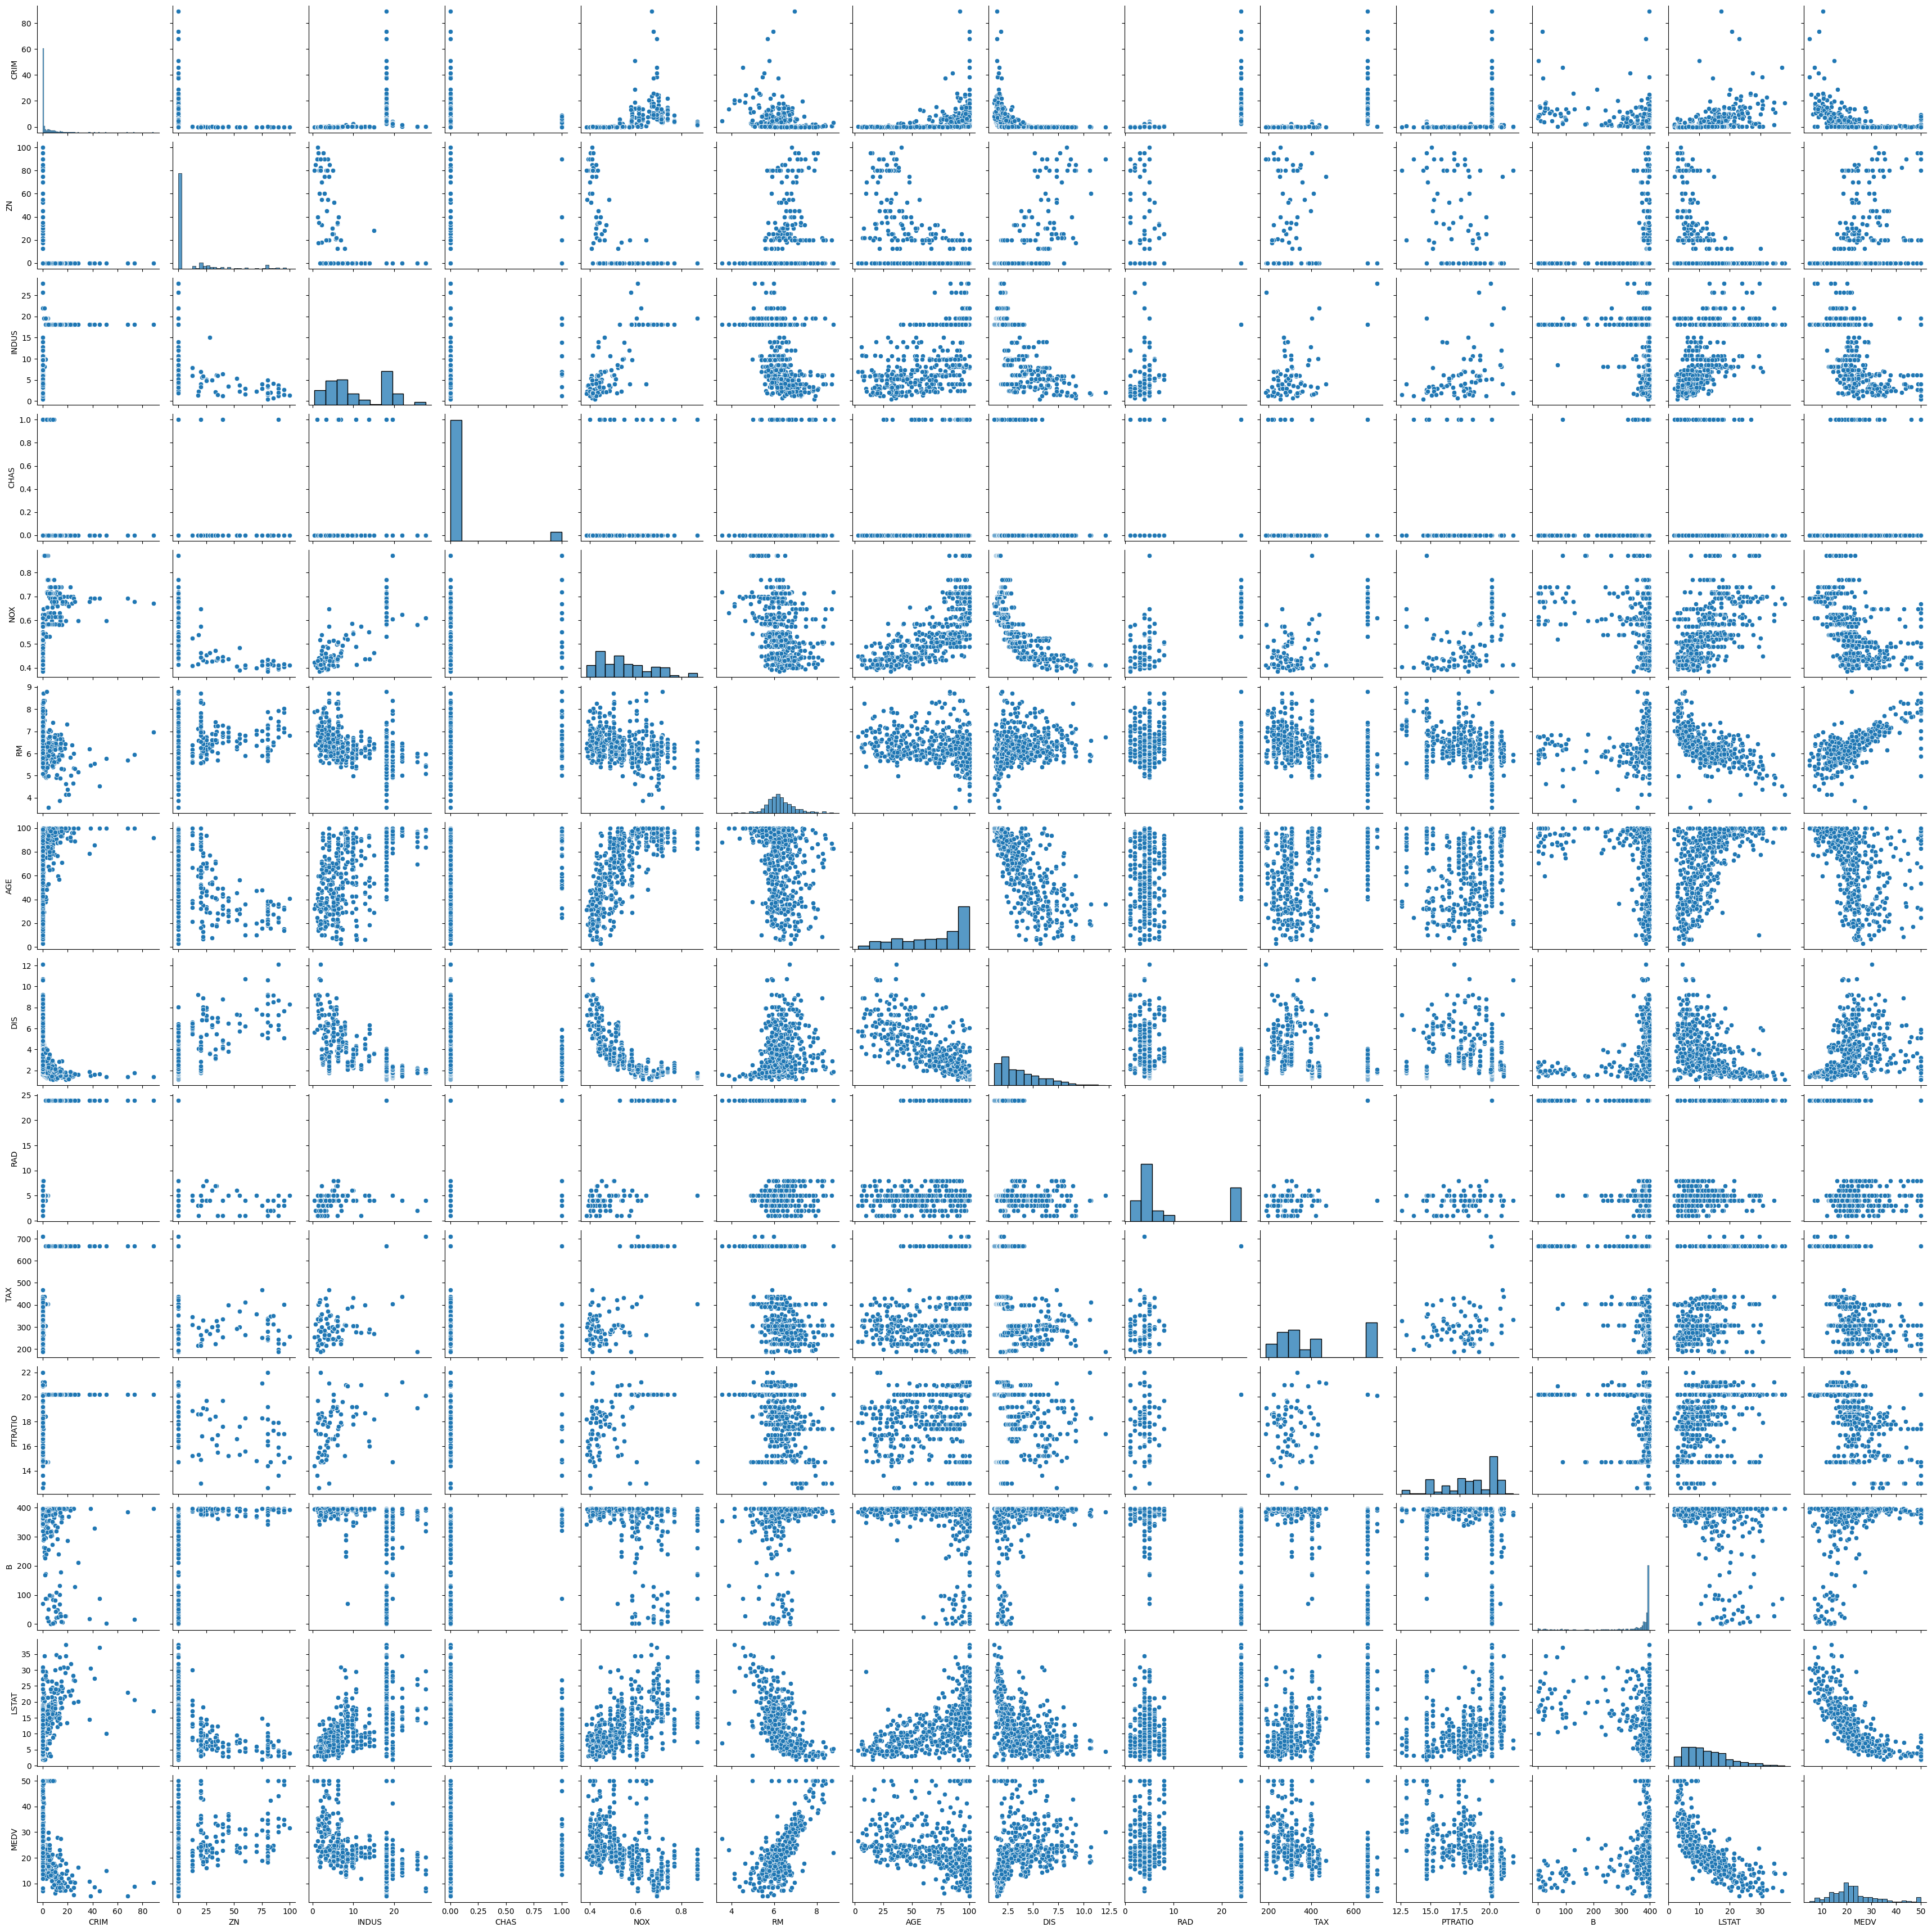

In [7]:
sns.pairplot(df1)

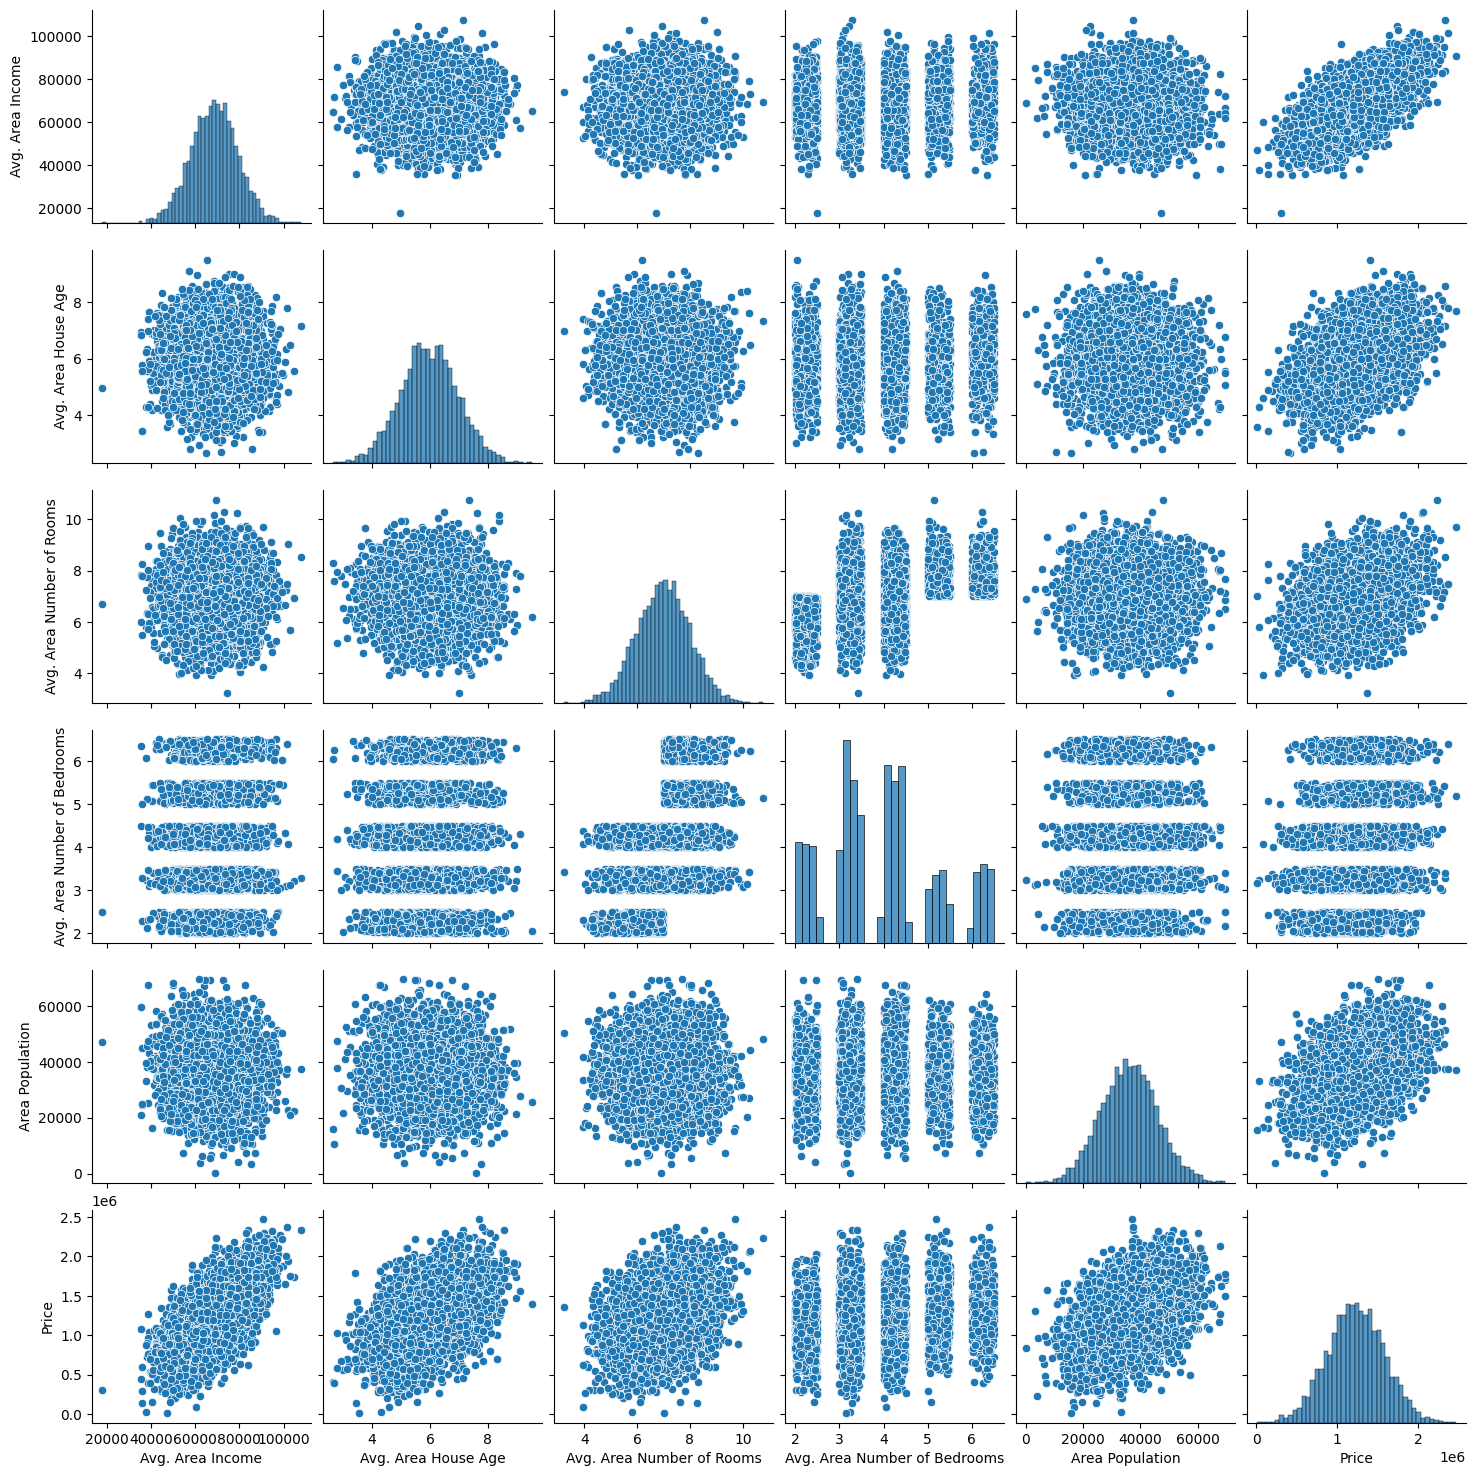

In [8]:
sns.pairplot(df2)

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**

    * LSTAT (% de estatus inferior de la población): fuerte correlación negativa

    * RM (número medio de habitaciones por vivienda): fuerte correlación positiva
    
    Estas dos características muestran la correlación más fuerte con la variable objetivo MEDV.
    
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity
    * LSTAT y RM
* LSTAT y RM son las variables más correladas con el target.

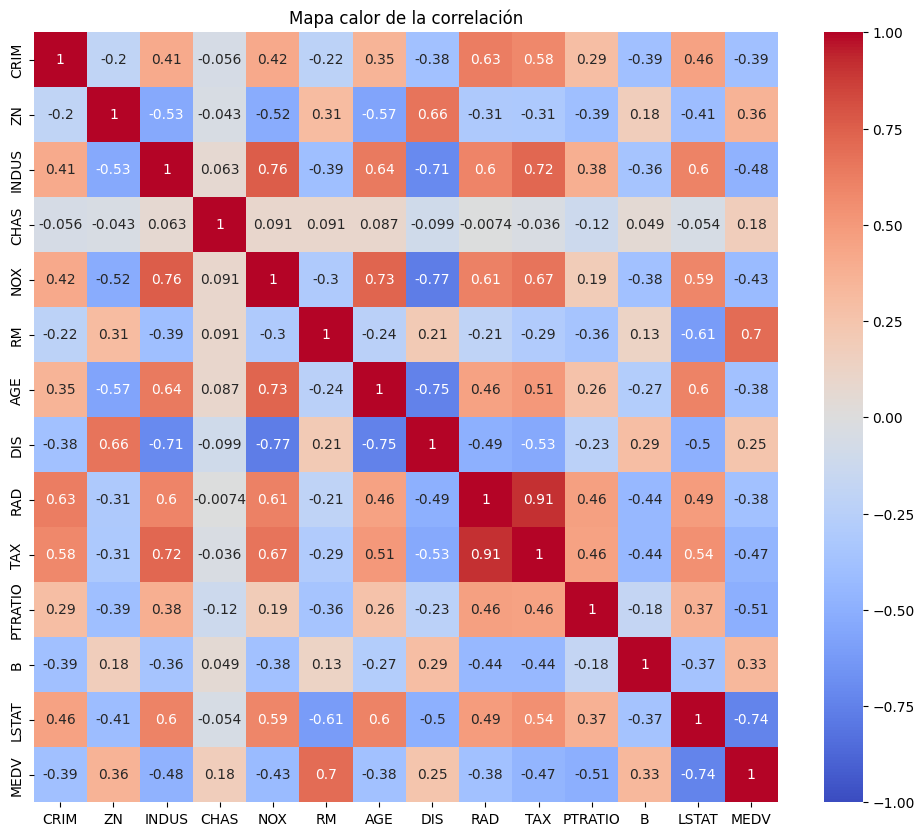

In [104]:
matriz_correlacion = df1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa calor de la correlación')
plt.show()

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [9]:
# Crear un DataFrame X con las columnas LSTAT and RM
X = df1[['LSTAT', 'RM']]
# Crear un target y de MEDV
y = df1['MEDV']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Printeamos los resultados:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (404, 2)
Shape of X_test: (102, 2)
Shape of Y_train: (404,)
Shape of Y_test: (102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
print("Longitud de X_train:", len(X_train))
print("Longitud de y_train:", len(y_train))

#Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train,y_train)

#Obtengo coeficientes
pendiente = modelo.coef_[0]
print(f"La pendiente es: {pendiente:.2f}")
intercepto = modelo.intercept_
print(f"El intercepto es: {intercepto:.2f}")
#Calculo el error cuadrático medio
mse_test = mean_squared_error(y_test,modelo.predict(X_test))
#Calculo el error cuadrático medio
r2_train = r2_score(y_train,modelo.predict(X_train))
r2_test = r2_score(y_test,modelo.predict(X_test))

#Imprimimos los resultados:
print(f"Ecuación de la línea de regresión: Y = {intercepto:.2f} + {pendiente:.2f}X")
print(f"R^2 (entrenamiento): {r2_train:.4f}")
print(f"R^2 (prueba): {r2_test:.4f}")
print(f"MSE (prueba): {mse_test:.4f}")

Longitud de X_train: 404
Longitud de y_train: 404
La pendiente es: -0.63
El intercepto es: -3.84
Ecuación de la línea de regresión: Y = -3.84 + -0.63X
R^2 (entrenamiento): 0.6502
R^2 (prueba): 0.5740
MSE (prueba): 31.2433


**Evaluate the model performance in the training and testing sets**

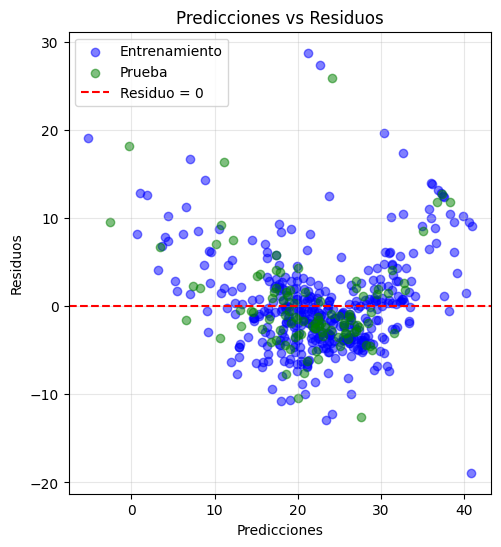

In [13]:
#Hacer predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

#Calcular residuos
residuos_train = y_train - y_pred_train
residuos_test = y_test - y_pred_test

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuos_train, color="blue", label="Entrenamiento", alpha=0.5)
plt.scatter(y_pred_test, residuos_test, color="green", label="Prueba", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Residuo = 0")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Predicciones vs Residuos")
plt.legend()
plt.grid(True, alpha=0.3)

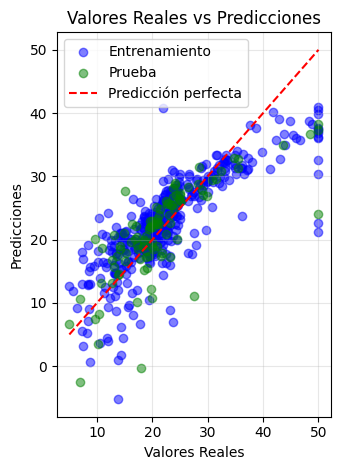

In [110]:
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train, color="blue", label="Entrenamiento", alpha=0.5)
plt.scatter(y_test, y_pred_test, color="green", label="Prueba", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', label="Predicción perfecta")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

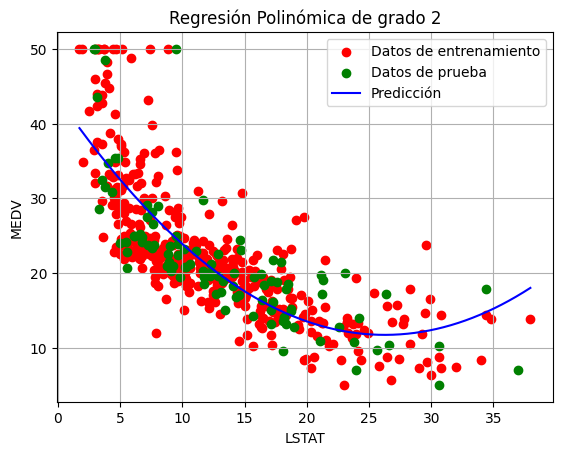

R^2 (entrenamiento): 0.6418
R^2 (prueba): 0.6269
MSE (prueba): 27.3628


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

X = df1[['LSTAT']].values
y = df1['MEDV'].values

# Dividimos los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos las características polinómicas de grado 2 para el conjunto de entrenamiento
poly_feats = PolynomialFeatures(degree=2)
X_train_poly = poly_feats.fit_transform(X_train)

# Ajustamos el modelo de regresión polinómica usando el conjunto de entrenamiento
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

# Transformamos el conjunto de prueba para las predicciones
X_test_poly = poly_feats.transform(X_test)

#Creamos una función para visualizar la regresión polinómica
def viz_polynomial():
    # Creamos un rango de valores de X para una curva suave
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_range_poly = poly_feats.transform(X_range)
    
    # Graficamos los puntos del conjunto de entrenamiento
    plt.scatter(X_train, y_train, color="red", label="Datos de entrenamiento")
    # Graficamos los puntos del conjunto de prueba
    plt.scatter(X_test, y_test, color="green", label="Datos de prueba")
    
    # Graficar la curva ajustada
    plt.plot(X_range, pol_reg.predict(X_range_poly), color="blue", label="Predicción")
    
    plt.title("Regresión Polinómica de grado 2")
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    plt.legend()
    plt.grid(True)
    plt.show()

viz_polynomial()

# Evaluamos el modelo en los datos de prueba
y_pred_train = pol_reg.predict(X_train_poly)
y_pred_test = pol_reg.predict(X_test_poly)

print(f"R^2 (entrenamiento): {r2_score(y_train, y_pred_train):.4f}")
print(f"R^2 (prueba): {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE (prueba): {mean_squared_error(y_test, y_pred_test):.4f}")


**Did the model improve using the Polynomial model?**

In [112]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)

#Modelo Polinómico (grado 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)
y_pred_poly = modelo_poly.predict(X_test_poly)

#Comparamos las métricas
print("Comparación de modelos:")
print("\nModelo Lineal:")
print(f"R² (test): {r2_score(y_test, y_pred_lineal):.3f}")
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test, y_pred_lineal)):.3f}")

print("\nModelo Polinómico:")
print(f"R² (test): {r2_score(y_test, y_pred_poly):.3f}")
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.3f}")

Comparación de modelos:

Modelo Lineal:
R² (test): 0.543
RMSE (test): 5.790

Modelo Polinómico:
R² (test): 0.627
RMSE (test): 5.231


**Did the model improve using the Polynomial model with degree 3? Or more?**

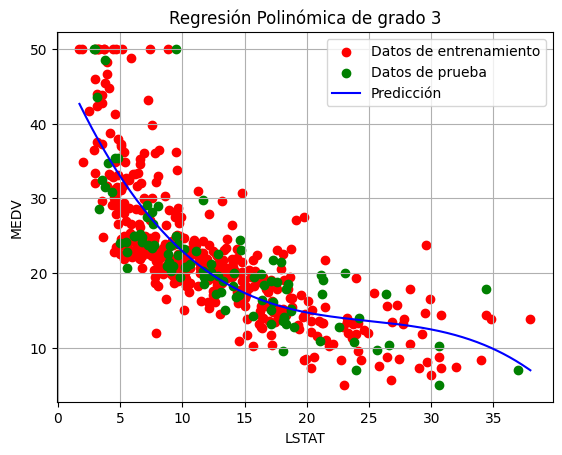

R^2 (entrenamiento): 0.6569
R^2 (prueba): 0.6552
MSE (prueba): 25.2840


In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X = df1[['LSTAT']].values
y = df1['MEDV'].values

# Dividimos los datos en conjunto de entrenamiento y de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos las características polinómicas de grado 3 para el conjunto de entrenamiento
poly_feats = PolynomialFeatures(degree=3)
X_train_poly = poly_feats.fit_transform(X_train)

# Ajustamos el modelo de regresión polinómica usando el conjunto de entrenamiento
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

# Transformamos el conjunto de prueba para las predicciones
X_test_poly = poly_feats.transform(X_test)

#Se crea la función para visualizar la regresión polinómica
def viz_polynomial():
    # Crear un rango de valores de X para una curva suave
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_range_poly = poly_feats.transform(X_range)
    
    # Graficamos los puntos del conjunto de entrenamiento
    plt.scatter(X_train, y_train, color="red", label="Datos de entrenamiento")
    # Graficamos los puntos del conjunto de prueba
    plt.scatter(X_test, y_test, color="green", label="Datos de prueba")
    # Graficamos la curva ajustada
    plt.plot(X_range, pol_reg.predict(X_range_poly), color="blue", label="Predicción")
    
    plt.title("Regresión Polinómica de grado 3")
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    plt.legend()
    plt.grid(True)
    plt.show()

viz_polynomial()

# Evaluamos por último el modelo en los datos de prueba
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = pol_reg.predict(X_train_poly)
y_pred_test = pol_reg.predict(X_test_poly)

print(f"R^2 (entrenamiento): {r2_score(y_train, y_pred_train):.4f}")
print(f"R^2 (prueba): {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE (prueba): {mean_squared_error(y_test, y_pred_test):.4f}")


Se puede ver que el grado 3 se ajusta mejor que el grado 2